## Basic Feature Engineering

In [1]:
import pandas as pd

In [2]:
def calculate_results(marks):
   total = sum(marks)
   average = total/len(marks)

   if average >= 90:
       grade = 'A'
   elif average>= 75:
       grade = 'B'
   else:
       grade = 'C'

   return total, average, grade

# input number of sturdents
stu_num = int(input("Number of students: "))

data = []
# loop for input marks
for i in range(stu_num):
    name = input("Name :")
    print(f"\n enter the marks of student{i+1}: ")
    s1 = float(input("Subject 1 marks: "))
    s2 = float(input("Subject 2 marks: "))
    s3 = float(input("Subject 3 marks: "))
    print("\n")
    total, avg, grade = calculate_results([s1, s2, s3])

    print(f"\nReport for {name}:")
    print(f"Total: {total}, Average: {avg:.2f}, Grade: {grade}")

    #Store the data in a pandas DataFrame
    data.append({ "Name":name, "Subject 1": s1,"Subject 2": s2,"Subject 3": s3,
                 "Total": total, "Average": avg, "Grade": grade})

df = pd.DataFrame(data)
print("\n📋 Student Report Card:")
print(df)

Number of students:  4
Name : Abhi



 enter the marks of student1: 


Subject 1 marks:  88
Subject 2 marks:  89
Subject 3 marks:  94





Report for Abhi:
Total: 271.0, Average: 90.33, Grade: A


Name : Aman



 enter the marks of student2: 


Subject 1 marks:  78
Subject 2 marks:  76
Subject 3 marks:  78





Report for Aman:
Total: 232.0, Average: 77.33, Grade: B


Name : Chintu



 enter the marks of student3: 


Subject 1 marks:  89
Subject 2 marks:  86
Subject 3 marks:  56





Report for Chintu:
Total: 231.0, Average: 77.00, Grade: B


Name : Dev



 enter the marks of student4: 


Subject 1 marks:  67
Subject 2 marks:  56
Subject 3 marks:  55





Report for Dev:
Total: 178.0, Average: 59.33, Grade: C

📋 Student Report Card:
     Name  Subject 1  Subject 2  Subject 3  Total    Average Grade
0    Abhi       88.0       89.0       94.0  271.0  90.333333     A
1    Aman       78.0       76.0       78.0  232.0  77.333333     B
2  Chintu       89.0       86.0       56.0  231.0  77.000000     B
3     Dev       67.0       56.0       55.0  178.0  59.333333     C


## Create new column

In [11]:
df['Pass'] = df['Average'].apply(lambda x: 'Yes' if x >= 40 else 'No')
df.head()

,Name,Subject 1,Subject 2,Subject 3,Total,Average,Grade,Pass,Grade_Code,Pass_Code,Total_scaled
0,Abhi,88.0,89.0,94.0,271.0,90.333333,A,Yes,3,1,1.000000
1,Aman,78.0,76.0,78.0,232.0,77.333333,B,Yes,2,1,0.580645
2,Chintu,89.0,86.0,56.0,231.0,77.000000,B,Yes,2,1,0.569892
3,Dev,67.0,56.0,55.0,178.0,59.333333,C,Yes,1,1,0.000000


## Encode categorial Values

In [12]:
df['Grade_Code'] = df['Grade'].map({'A': 3, 'B': 2, 'C': 1})
df['Pass_Code'] = df['Pass'].map({'Yes': 1, 'No': 0})
df.head()

,Name,Subject 1,Subject 2,Subject 3,Total,Average,Grade,Pass,Grade_Code,Pass_Code,Total_scaled
0,Abhi,88.0,89.0,94.0,271.0,90.333333,A,Yes,3,1,1.000000
1,Aman,78.0,76.0,78.0,232.0,77.333333,B,Yes,2,1,0.580645
2,Chintu,89.0,86.0,56.0,231.0,77.000000,B,Yes,2,1,0.569892
3,Dev,67.0,56.0,55.0,178.0,59.333333,C,Yes,1,1,0.000000


## Label Encoder

In [16]:
from sklearn.preprocessing import LabelEncoder

# Create encoder object
le = LabelEncoder()

# Fit and transform the 'Grade' column
df['Grade_Code'] = le.fit_transform(df['Grade'])
df.head()

,Name,Subject 1,Subject 2,Subject 3,Total,Average,Grade,Pass,Grade_Code,Pass_Code,Total_scaled
0,Abhi,88.0,89.0,94.0,271.0,90.333333,A,Yes,0,1,1.000000
1,Aman,78.0,76.0,78.0,232.0,77.333333,B,Yes,1,1,0.580645
2,Chintu,89.0,86.0,56.0,231.0,77.000000,B,Yes,1,1,0.569892
3,Dev,67.0,56.0,55.0,178.0,59.333333,C,Yes,2,1,0.000000


## Handel missing values

In [17]:
df.fillna(0, inplace=True)  # Or use dropna()
df.head()

,Name,Subject 1,Subject 2,Subject 3,Total,Average,Grade,Pass,Grade_Code,Pass_Code,Total_scaled
0,Abhi,88.0,89.0,94.0,271.0,90.333333,A,Yes,0,1,1.000000
1,Aman,78.0,76.0,78.0,232.0,77.333333,B,Yes,1,1,0.580645
2,Chintu,89.0,86.0,56.0,231.0,77.000000,B,Yes,1,1,0.569892
3,Dev,67.0,56.0,55.0,178.0,59.333333,C,Yes,2,1,0.000000


## Correlation Matrix + heatmap

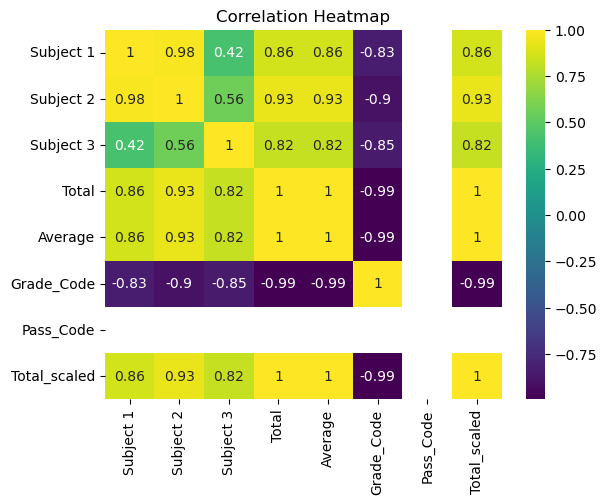

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='viridis')
plt.title("Correlation Heatmap")
plt.show()

## Normalize Columns from MinMaxScalar

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Total_scaled']] = scaler.fit_transform(df[['Total']])
df.head()

,Name,Subject 1,Subject 2,Subject 3,Total,Average,Grade,Pass,Grade_Code,Pass_Code,Total_scaled
0,Abhi,88.0,89.0,94.0,271.0,90.333333,A,Yes,0,1,1.000000
1,Aman,78.0,76.0,78.0,232.0,77.333333,B,Yes,1,1,0.580645
2,Chintu,89.0,86.0,56.0,231.0,77.000000,B,Yes,1,1,0.569892
3,Dev,67.0,56.0,55.0,178.0,59.333333,C,Yes,2,1,0.000000


## Normalize Columns from StandardScaler

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Total_standard']] = scaler.fit_transform(df[['Total']])
df.head()

,Name,Subject 1,Subject 2,Subject 3,Total,Average,Grade,Pass,Grade_Code,Pass_Code,Total_scaled,Total_standard
0,Abhi,88.0,89.0,94.0,271.0,90.333333,A,Yes,0,1,1.000000,1.300346
1,Aman,78.0,76.0,78.0,232.0,77.333333,B,Yes,1,1,0.580645,0.120962
2,Chintu,89.0,86.0,56.0,231.0,77.000000,B,Yes,1,1,0.569892,0.090722
3,Dev,67.0,56.0,55.0,178.0,59.333333,C,Yes,2,1,0.000000,-1.512031
